In [1024]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('dark_background')

In [1025]:
df = pd.read_csv('bank.csv')

In [1026]:
*df.shape,\
df.columns

(4521,
 17,
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y'],
       dtype='object'))

In [1027]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [1028]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [1029]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [1030]:
df.quantile([.1, .3, .5, .7])

,age,balance,day,duration,campaign,pdays,previous
0.1,29.0,0.0,5.0,58.0,1.0,-1.0,0.0
0.3,34.0,128.0,11.0,119.0,1.0,-1.0,0.0
0.5,39.0,444.0,16.0,185.0,2.0,-1.0,0.0
0.7,47.0,1147.0,20.0,285.0,3.0,-1.0,0.0


#### Checking for NaN/duplicate values

In [1031]:
# checking for missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [1032]:
df.duplicated().sum()

0

In [1033]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [1034]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [1035]:
categorical_var_names = list(set(df.columns) - set(df.select_dtypes(include=np.number).columns))

#for var in categorical_var_names:
#    df[var] = df[var].astype('category')

categorical_var_names

['contact',
 'month',
 'job',
 'loan',
 'education',
 'housing',
 'poutcome',
 'default',
 'y',
 'marital']

In [1036]:
categorical_vars = { var_name : set(df.get(var_name).unique()) for var_name in categorical_var_names }
categorical_vars

{'contact': {'cellular', 'telephone', 'unknown'},
 'month': {'apr',
  'aug',
  'dec',
  'feb',
  'jan',
  'jul',
  'jun',
  'mar',
  'may',
  'nov',
  'oct',
  'sep'},
 'job': {'admin.',
  'blue-collar',
  'entrepreneur',
  'housemaid',
  'management',
  'retired',
  'self-employed',
  'services',
  'student',
  'technician',
  'unemployed',
  'unknown'},
 'loan': {'no', 'yes'},
 'education': {'primary', 'secondary', 'tertiary', 'unknown'},
 'housing': {'no', 'yes'},
 'poutcome': {'failure', 'other', 'success', 'unknown'},
 'default': {'no', 'yes'},
 'y': {'no', 'yes'},
 'marital': {'divorced', 'married', 'single'}}

##### There are no NaN values, but there are 'unknown'/'other'

In [1037]:
vars_with_unknown = [ var for var in categorical_vars if 'unknown' in categorical_vars[var] ]
vars_with_unknown

['contact', 'job', 'education', 'poutcome']

In [1038]:
for var in vars_with_unknown:
    print(f'{var} -> unknown: {df.loc[df[var] == "unknown"].shape[0] / df.shape[0] * 100}%')

print(f'poutcome -> other: {df.loc[df.poutcome == "other"].shape[0] / df.shape[0] * 100}%')

contact -> unknown: 29.285556292855563%
job -> unknown: 0.8405220084052201%
education -> unknown: 4.13625304136253%
poutcome -> unknown: 81.95089581950896%
poutcome -> other: 4.35744304357443%


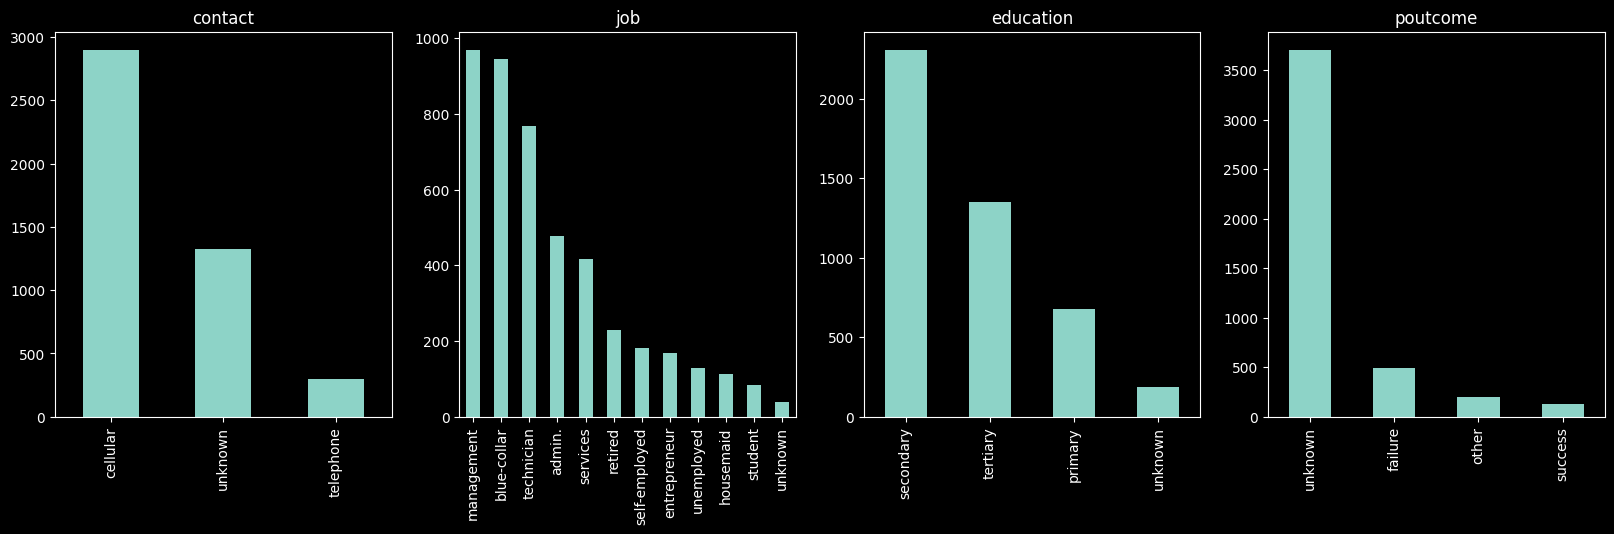

In [1039]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for var_name, ax_i in zip(vars_with_unknown, ax.flatten()):
    df.get(var_name).value_counts().plot.bar(ax=ax_i, rot=90)
    ax_i.set_title(var_name)

##### For education we'll remove the unknown

In [1042]:
df = df[df.education != 'unknown']
len(df.loc[df.education == 'unknown'])

0

##### For job the percentage of unknown values is 0.8% so it's safe to simply replace them with the mode

In [1045]:
crosstab = pd.crosstab(index=df.job, columns=df.y, normalize='index').sort_values('yes', ascending=False)
crosstab

y,no,yes
job,,
student,0.720588,0.279412
retired,0.763889,0.236111
unknown,0.826087,0.173913
management,0.865180,0.134820
housemaid,0.869159,0.130841
admin.,0.878525,0.121475
technician,0.890080,0.109920
self-employed,0.893855,0.106145
unemployed,0.896825,0.103175


<AxesSubplot:xlabel='job'>

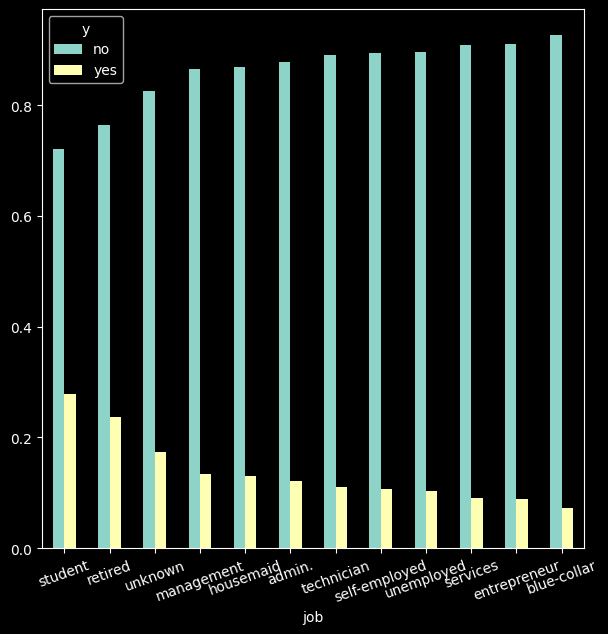

In [1046]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

crosstab.plot.bar(ax=ax, rot=20)

In [1047]:
df.loc[df['job'] == 'unknown', 'job'] = df['job'].mode()
len(df.loc[df['job'] == 'unknown'])

0

##### For contact we'll find some correlated feature/s and predict the unknown values

In [1048]:
# finding features that have good correlation with contact

sub_df = pd.DataFrame(df.loc[df['contact'] != 'unknown'])

crosstabs = [ (pd.crosstab(index=sub_df[var], columns=sub_df['contact']), var) for var in categorical_var_names]

from scipy.stats import chi2_contingency

print(sorted([ (chi2_contingency(crosstab[0])[1], crosstab[1]) for crosstab in crosstabs ])[1:5])

# converting contact to numeric to find correletion between the numeric vars
contact_numeric_labels, contact_str_labels = pd.factorize(sub_df['contact'])

sub_df['contact_label'] = contact_numeric_labels

sorted([(abs(sub_df.get(var).corr(sub_df.contact_label)), var) for var in sub_df.select_dtypes(include=np.number).columns], reverse=True)[1:4]

[(8.808559075613879e-12, 'education'), (1.5968862672550162e-09, 'month'), (3.5396032137046085e-08, 'job'), (0.008695722624279603, 'marital')]


[(0.19721559655926452, 'age'),
 (0.04776654635799076, 'day'),
 (0.04317364735186348, 'balance')]

##### We'll use education, job, month and age to predict the unknown values in contact with Logistic Regression (the high correletion suggested from the chi square test could be misleading because of the number of samples between classes in the chi square table internally, but it should be good enough to use for predictions)

In [1049]:
# first we must convert the categorical vars to numeric
inputs, target = ['education', 'job', 'month', 'age'], 'contact_label'

for var in inputs[:-1]:
    labels, _ = pd.factorize(sub_df[var])
    sub_df[var] = labels

print(sub_df.contact_label.value_counts())
sub_df[inputs].head()

0    2801
1     282
Name: contact_label, dtype: int64


,education,job,month,age
0,0,0,0,30
1,1,1,1,33
2,2,2,2,35
5,2,2,3,35
6,2,3,1,36


##### Because there is very high imbalance between number of observations between classes we'll up-sample the minority class (1)

In [1050]:
from sklearn.utils import resample

sub_df_majority = sub_df[sub_df.contact_label == 0]
sub_df_minority = sub_df[sub_df.contact_label == 1]

sub_df_minority_upsampled = resample(
    sub_df_minority, 
    replace=True, 
    n_samples=len(sub_df_majority),
    random_state=123
)

sub_df_upsampled = pd.concat([sub_df_majority, sub_df_minority_upsampled])

sub_df_upsampled.contact_label.value_counts()

0    2801
1    2801
Name: contact_label, dtype: int64

##### Now we can safely make predictions since the number of observations between classes if equal

In [1051]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = sub_df_upsampled[inputs].values
y = sub_df_upsampled[target].values
print(f'{X.shape=}, {y.shape=}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
print(f'{X_train.shape=}, {y_train.shape=}')

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

X.shape=(5602, 4), y.shape=(5602,)
X_train.shape=(4201, 4), y_train.shape=(4201,)


##### Visualizing effectiveness of our model using confusion matrix

Text(0.5, 427.9555555555555, 'Predicted label')

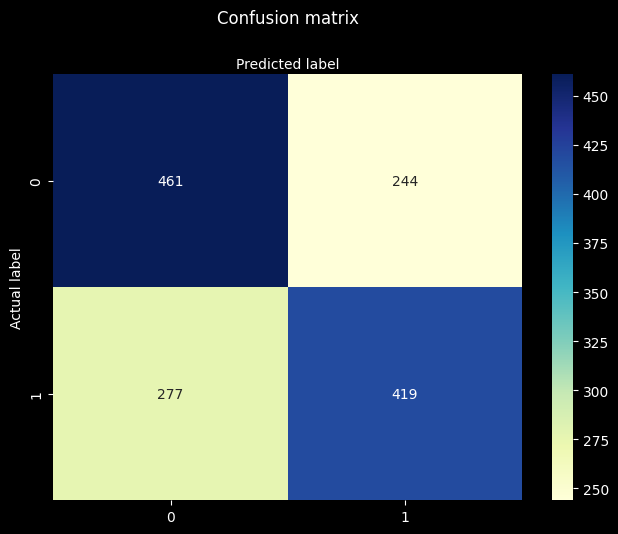

In [1052]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [1053]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=list(contact_str_labels)))

              precision    recall  f1-score   support

    cellular       0.62      0.65      0.64       705
   telephone       0.63      0.60      0.62       696

    accuracy                           0.63      1401
   macro avg       0.63      0.63      0.63      1401
weighted avg       0.63      0.63      0.63      1401



##### Replacing the unknowns of contact with the predictions

cellular     3613
telephone     721
Name: contact, dtype: int64


<AxesSubplot:>

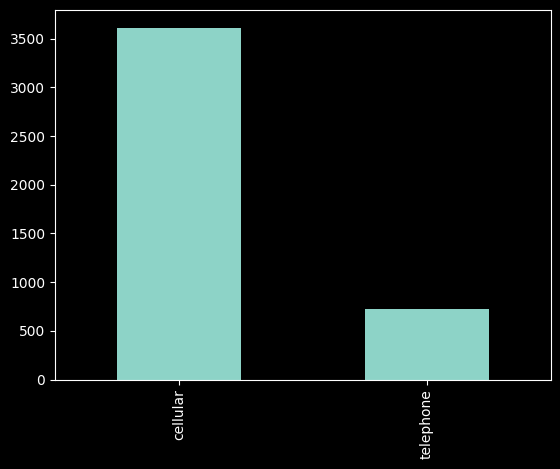

In [1054]:
mask = ~(df['contact'] == 'unknown')
sub_df = pd.DataFrame(df.loc[mask, inputs])

for var in inputs[:-1]:
    labels, _ = pd.factorize(sub_df[var])
    sub_df[var] = labels

X = sub_df[inputs].values
contact_pred = log_reg.predict(X)

predicted_str_labels = [contact_str_labels[i] for i in contact_pred]

for idx, new_value in zip(df.loc[df['contact'] == 'unknown'].index, predicted_str_labels):
    df.at[idx, 'contact'] = new_value

print(df.contact.value_counts())
df.contact.value_counts().plot.bar()

##### Applying the same strategy for poutcome

In [1055]:
# finding features that have good correlation with poutcome

sub_df = pd.DataFrame(df.loc[(df['poutcome'] != 'unknown') & (df['poutcome'] != 'other')])
print(sub_df.poutcome.value_counts())

crosstabs = [ (pd.crosstab(index=sub_df[var], columns=sub_df['poutcome']), var) for var in categorical_var_names]

from scipy.stats import chi2_contingency

print(sorted([ (chi2_contingency(crosstab[0])[1], crosstab[1]) for crosstab in crosstabs ])[1:5])

# converting poutcome to numeric to find correletion between the numeric vars
poutcome_numeric_labels, poutcome_str_labels = pd.factorize(sub_df['poutcome'])

sub_df['poutcome_label'] = poutcome_numeric_labels

sorted([(abs(sub_df.get(var).corr(sub_df.poutcome_label)), var) for var in sub_df.select_dtypes(include=np.number).columns], reverse=True)[1:4]

failure    471
success    119
Name: poutcome, dtype: int64
[(4.123424525829902e-32, 'y'), (1.7875628921937723e-14, 'housing'), (1.1419892921082612e-12, 'month'), (0.0040524829999644164, 'loan')]


[(0.2782947804839436, 'pdays'),
 (0.14902772185614235, 'duration'),
 (0.08301387170461501, 'age')]

In [1056]:
sub_df['poutcome_label'].value_counts()

0    471
1    119
Name: poutcome_label, dtype: int64

In [1057]:
# first we must convert the categorical vars to numeric
inputs, target = ['y', 'housing', 'month', 'loan', 'pdays'], 'poutcome_label'

for var in inputs[:-1]:
    labels, _ = pd.factorize(sub_df[var])
    sub_df[var] = labels

print(f'Before sampling: {sub_df.poutcome_label.value_counts()}')

sub_df_majority = sub_df[sub_df.poutcome_label == 0]
sub_df_minority = sub_df[sub_df.poutcome_label == 1]

sub_df_minority_upsampled = resample(
    sub_df_minority, 
    replace=True, 
    n_samples=len(sub_df_majority),
    random_state=123
)

sub_df_upsampled = pd.concat([sub_df_majority, sub_df_minority_upsampled])

print(f'After sampling: {sub_df_upsampled.poutcome_label.value_counts()}')

X = sub_df_upsampled[inputs].values
y = sub_df_upsampled[target].values
print(f'{X.shape=}, {y.shape=}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
print(f'{X_train.shape=}, {y_train.shape=}')

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred, target_names=list(poutcome_str_labels)))

Before sampling: 0    471
1    119
Name: poutcome_label, dtype: int64
After sampling: 0    471
1    471
Name: poutcome_label, dtype: int64
X.shape=(942, 5), y.shape=(942,)
X_train.shape=(706, 5), y_train.shape=(706,)
              precision    recall  f1-score   support

     failure       0.76      0.85      0.81       110
     success       0.86      0.77      0.81       126

    accuracy                           0.81       236
   macro avg       0.81      0.81      0.81       236
weighted avg       0.81      0.81      0.81       236



failure    3025
success    1309
Name: poutcome, dtype: int64


<AxesSubplot:>

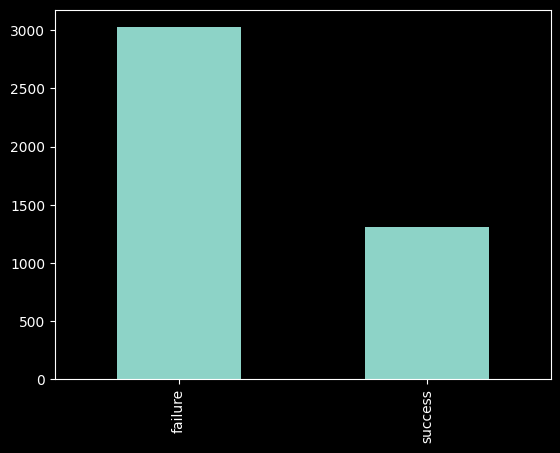

In [1070]:
mask = ~((df['poutcome'] == 'unknown') | (df['poutcome'] == 'other'))
sub_df = pd.DataFrame(df.loc[mask, inputs])

for var in inputs[:-1]:
    labels, _ = pd.factorize(sub_df[var])
    sub_df[var] = labels

X = sub_df[inputs].values
poutcome_pred = log_reg.predict(X)

predicted_str_labels = [poutcome_str_labels[i] for i in poutcome_pred]

for idx, new_value in zip(df.loc[(df['poutcome'] == 'unknown') | (df['poutcome'] == 'other')].index, predicted_str_labels):
    df.at[idx, 'poutcome'] = new_value

print(df.poutcome.value_counts())
df.poutcome.value_counts().plot.bar()

### Plotting categorical variables densities

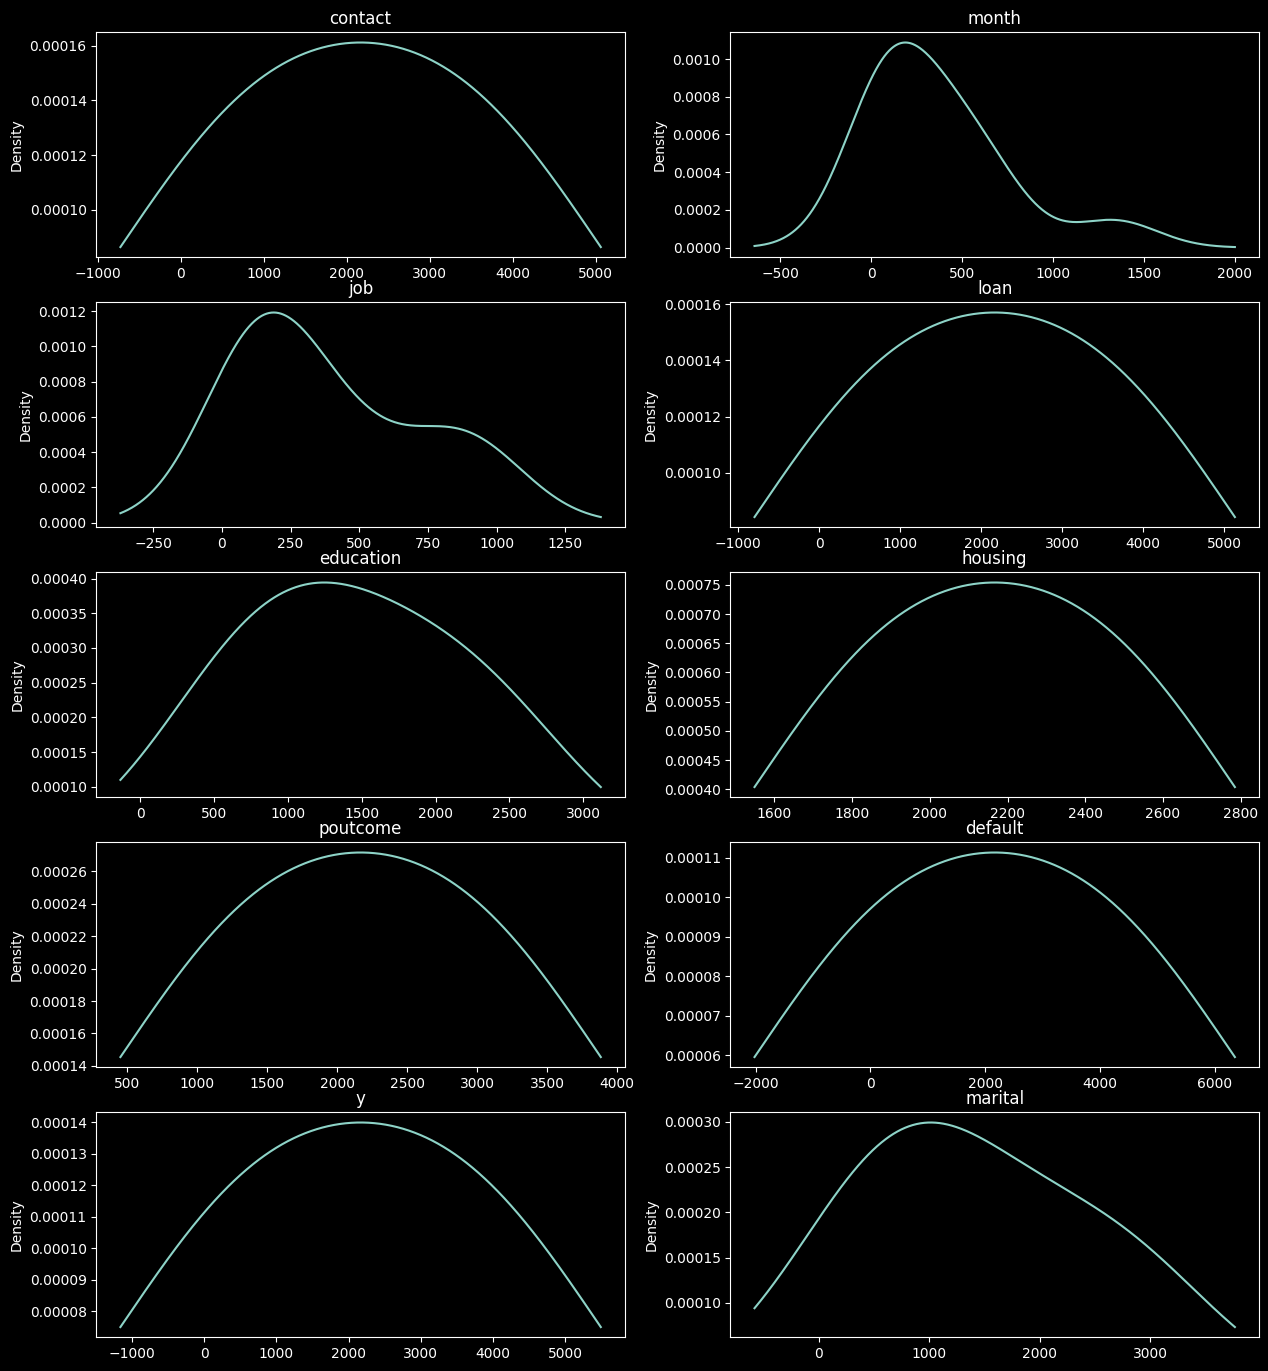

In [1062]:
_, ax = plt.subplots(5, 2, figsize=(15, 15))

plt.subplots_adjust(bottom=0.01)


for var_name, ax_i in zip(categorical_var_names, ax.flatten()):
    df.get(var_name).value_counts().plot.density(ax=ax_i)
    ax_i.set_title(var_name)

In [1063]:
numeric_var_names = df._get_numeric_data().columns
numeric_var_names

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

### Plotting target variable density

Text(0.5, 1.0, 'y')

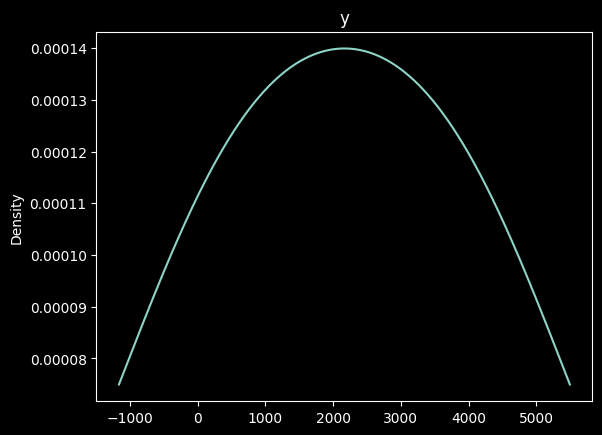

In [1065]:
_, ax = plt.subplots(1, 1)

df.y.value_counts().plot.density(ax=ax)
ax.set_title('y')


### Plotting numeric variables densities

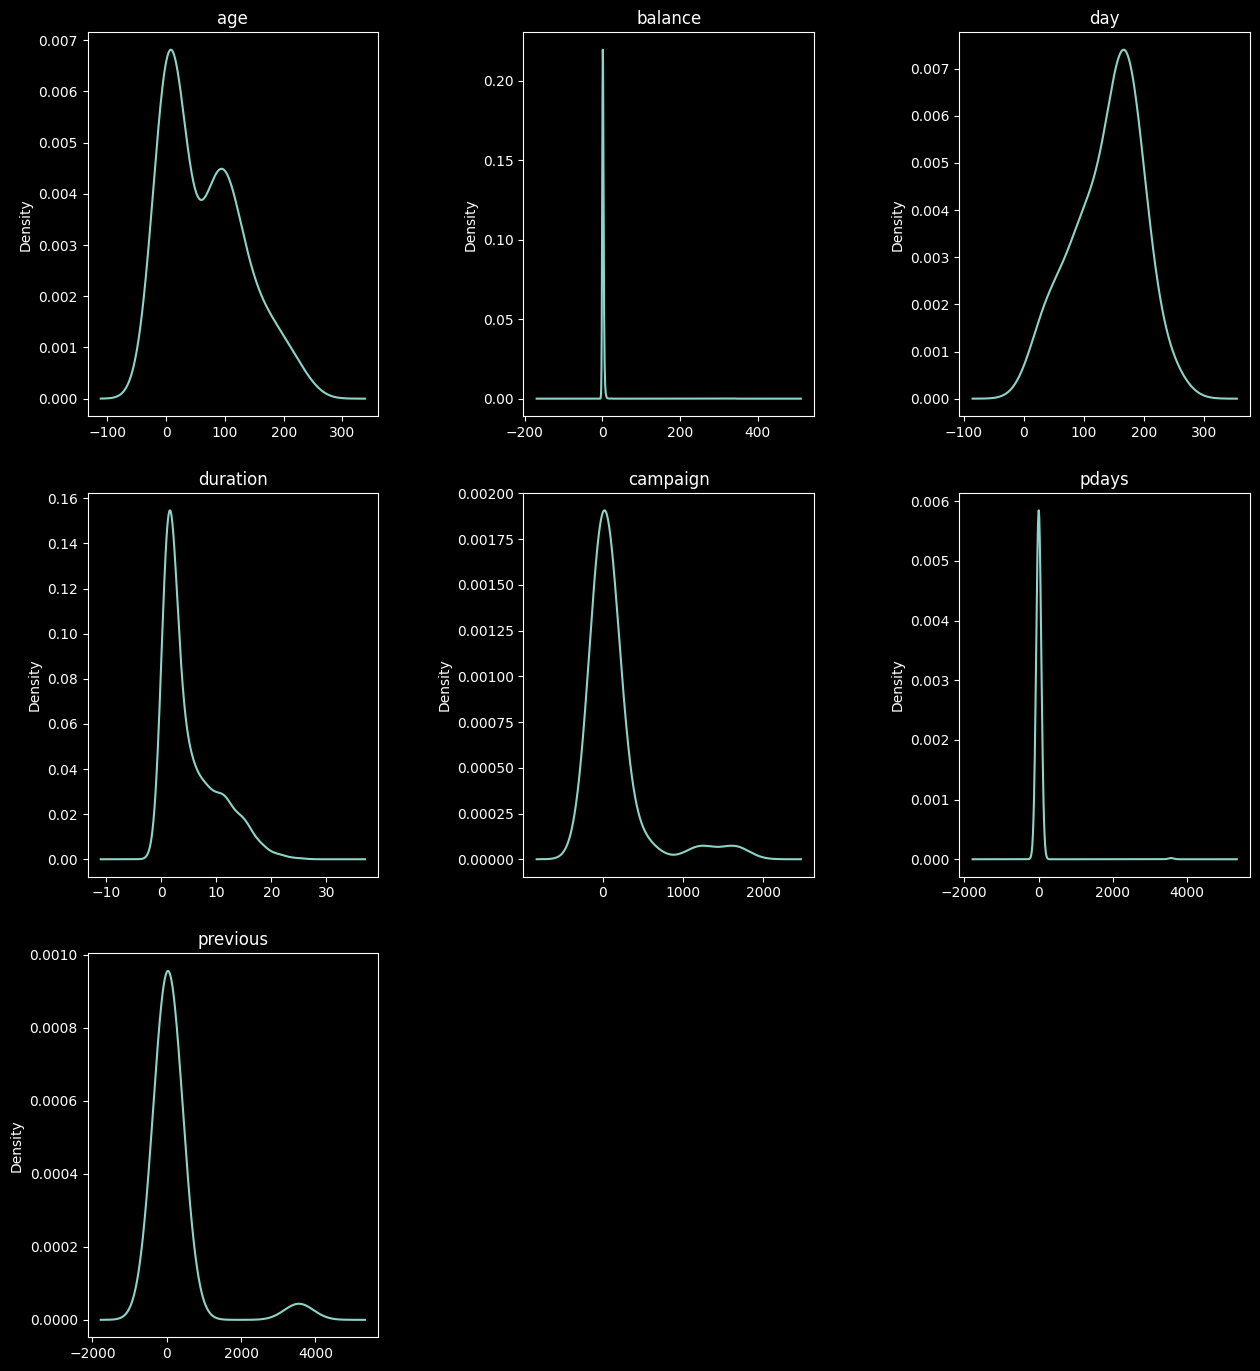

In [1066]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(bottom=0.01, wspace=0.5)

for var_name, ax_i in zip(numeric_var_names, ax.flatten()):
    df.get(var_name).value_counts().plot.density(ax=ax_i)
    ax_i.set_title(var_name)

fig.delaxes(ax[2][1]); fig.delaxes(ax[2][2])

#### Target's pie chart

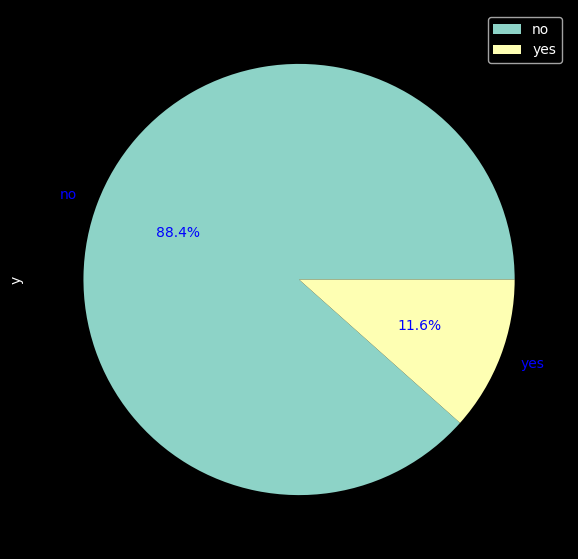

In [1067]:
_, ax = plt.subplots(1,1, figsize=(7,7))

df.y.value_counts(sort=True).plot.pie(legend=True,autopct='%1.1f%%', textprops={'color':'b'}, ax=ax)
plt.show()

## Correlation/Covariance

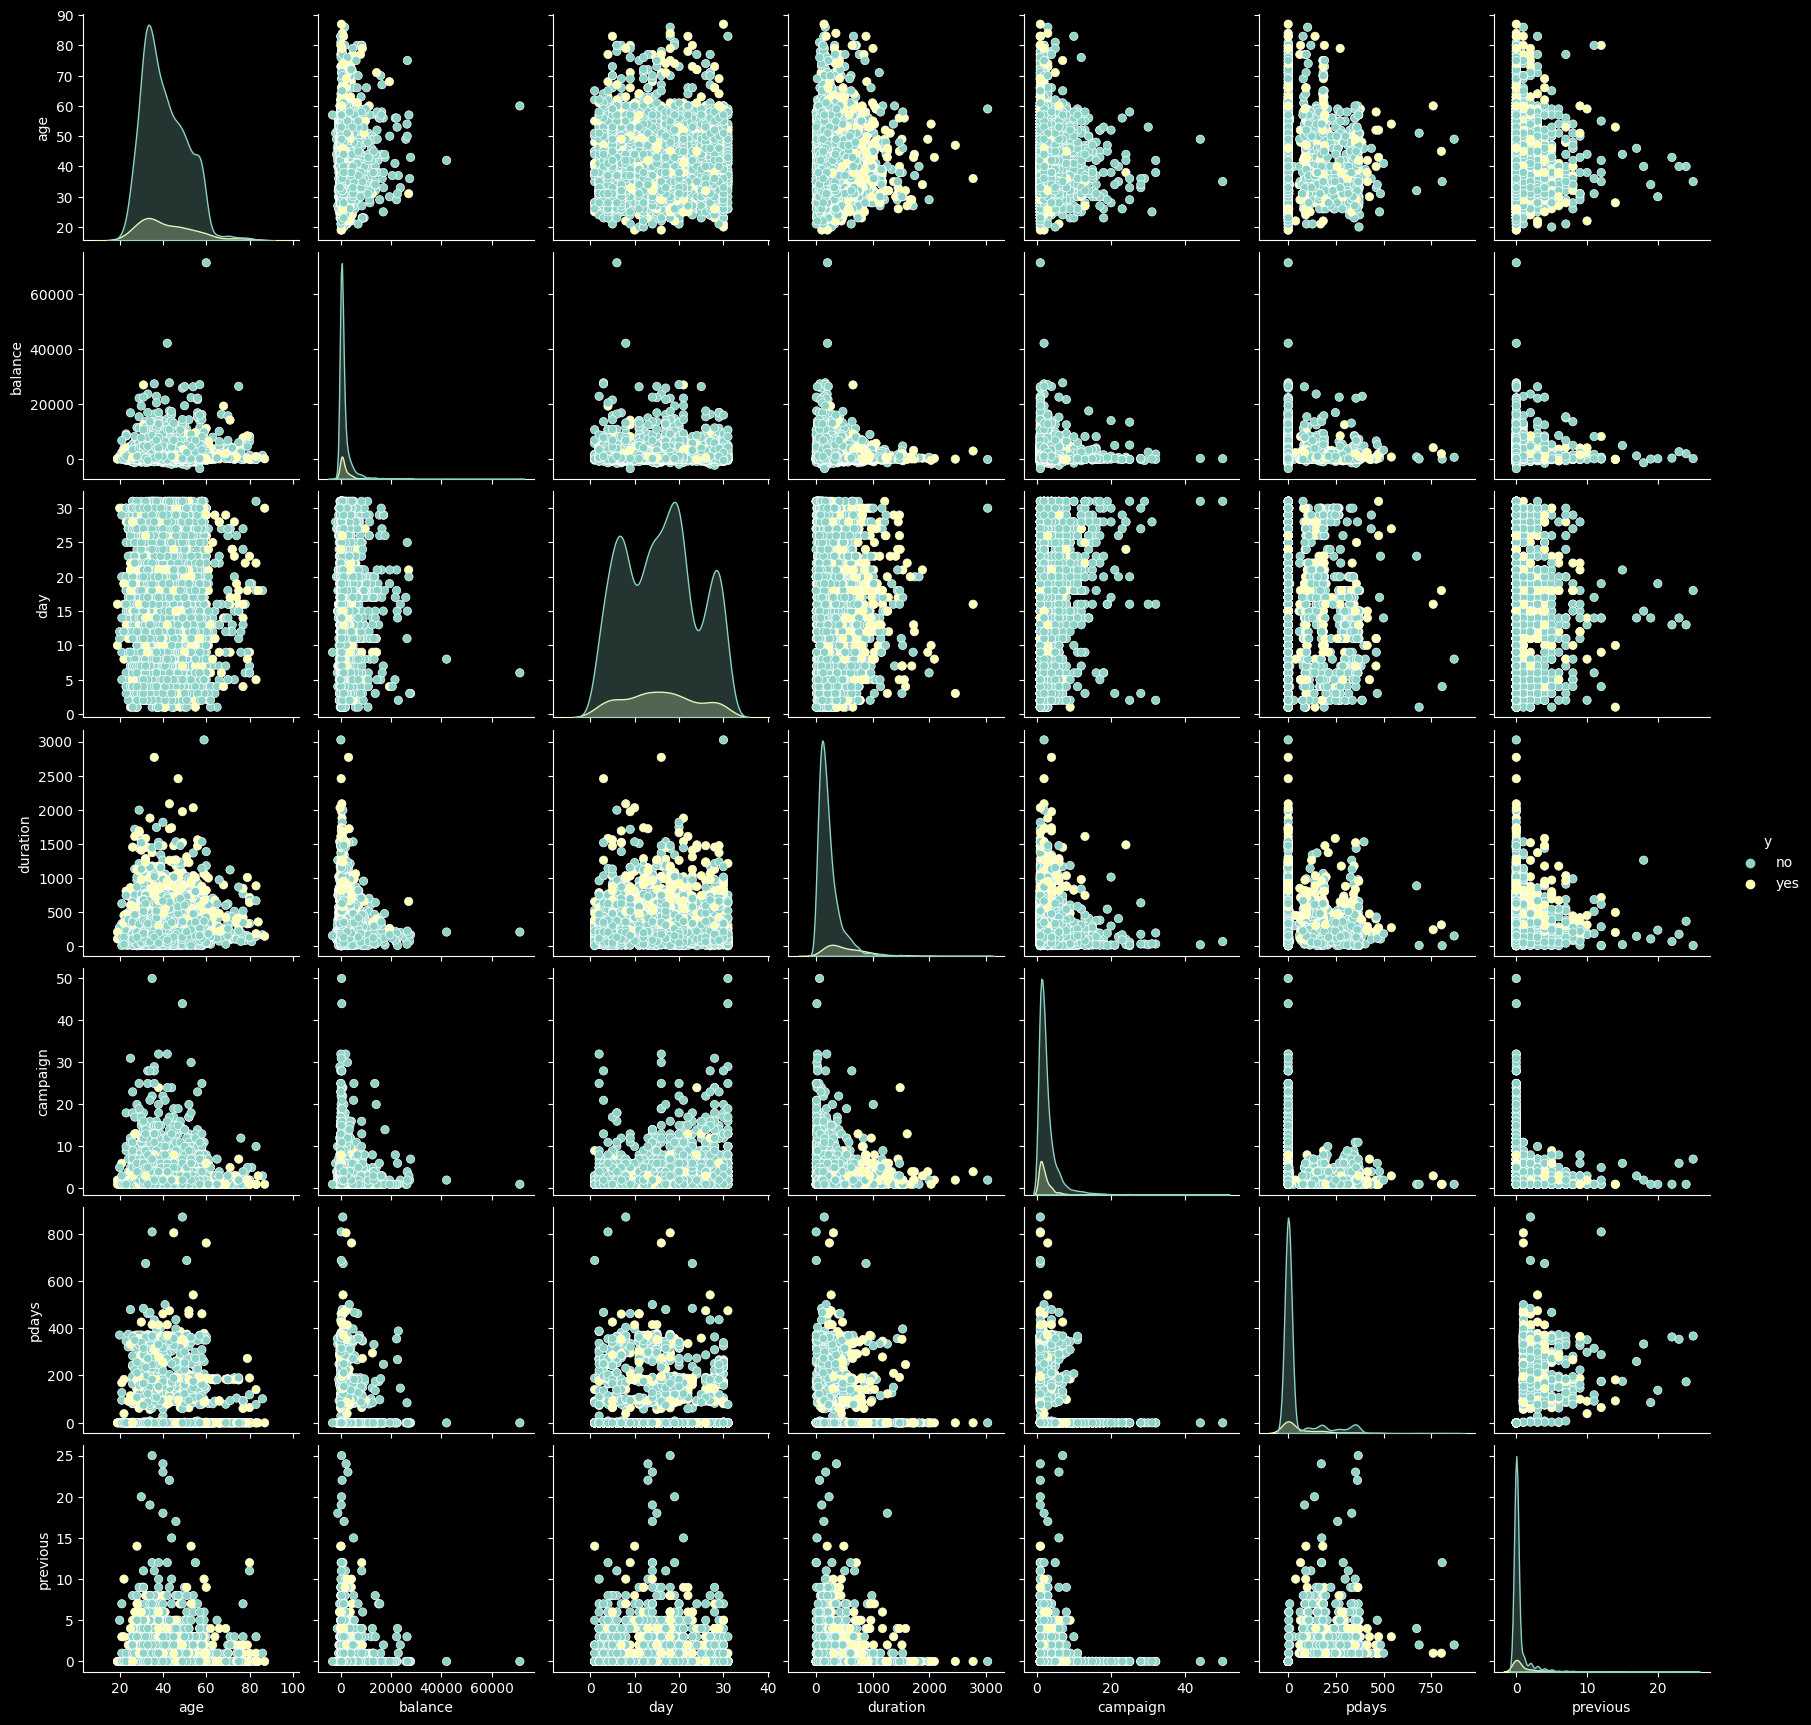

In [1068]:
sns.pairplot(data=df, hue='y')

In [906]:
df.corr(method='pearson')

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


<AxesSubplot:>

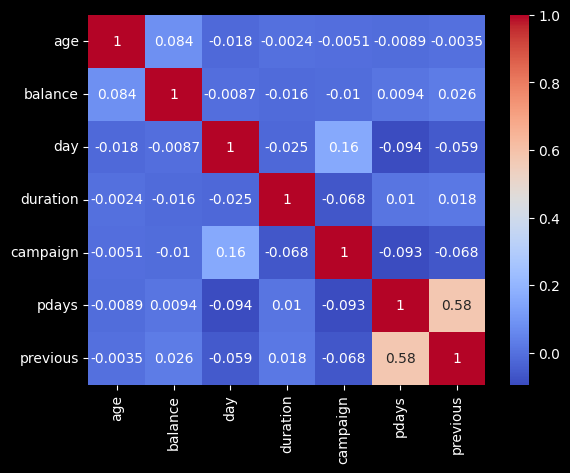

In [20]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [913]:
# creating all crosstabs between categorical variables
crosstabs = [ pd.crosstab(index=df.get(var), columns=df.y, normalize='index').sort_values('yes', ascending=False) for var in categorical_var_names ]
len(crosstabs)

10

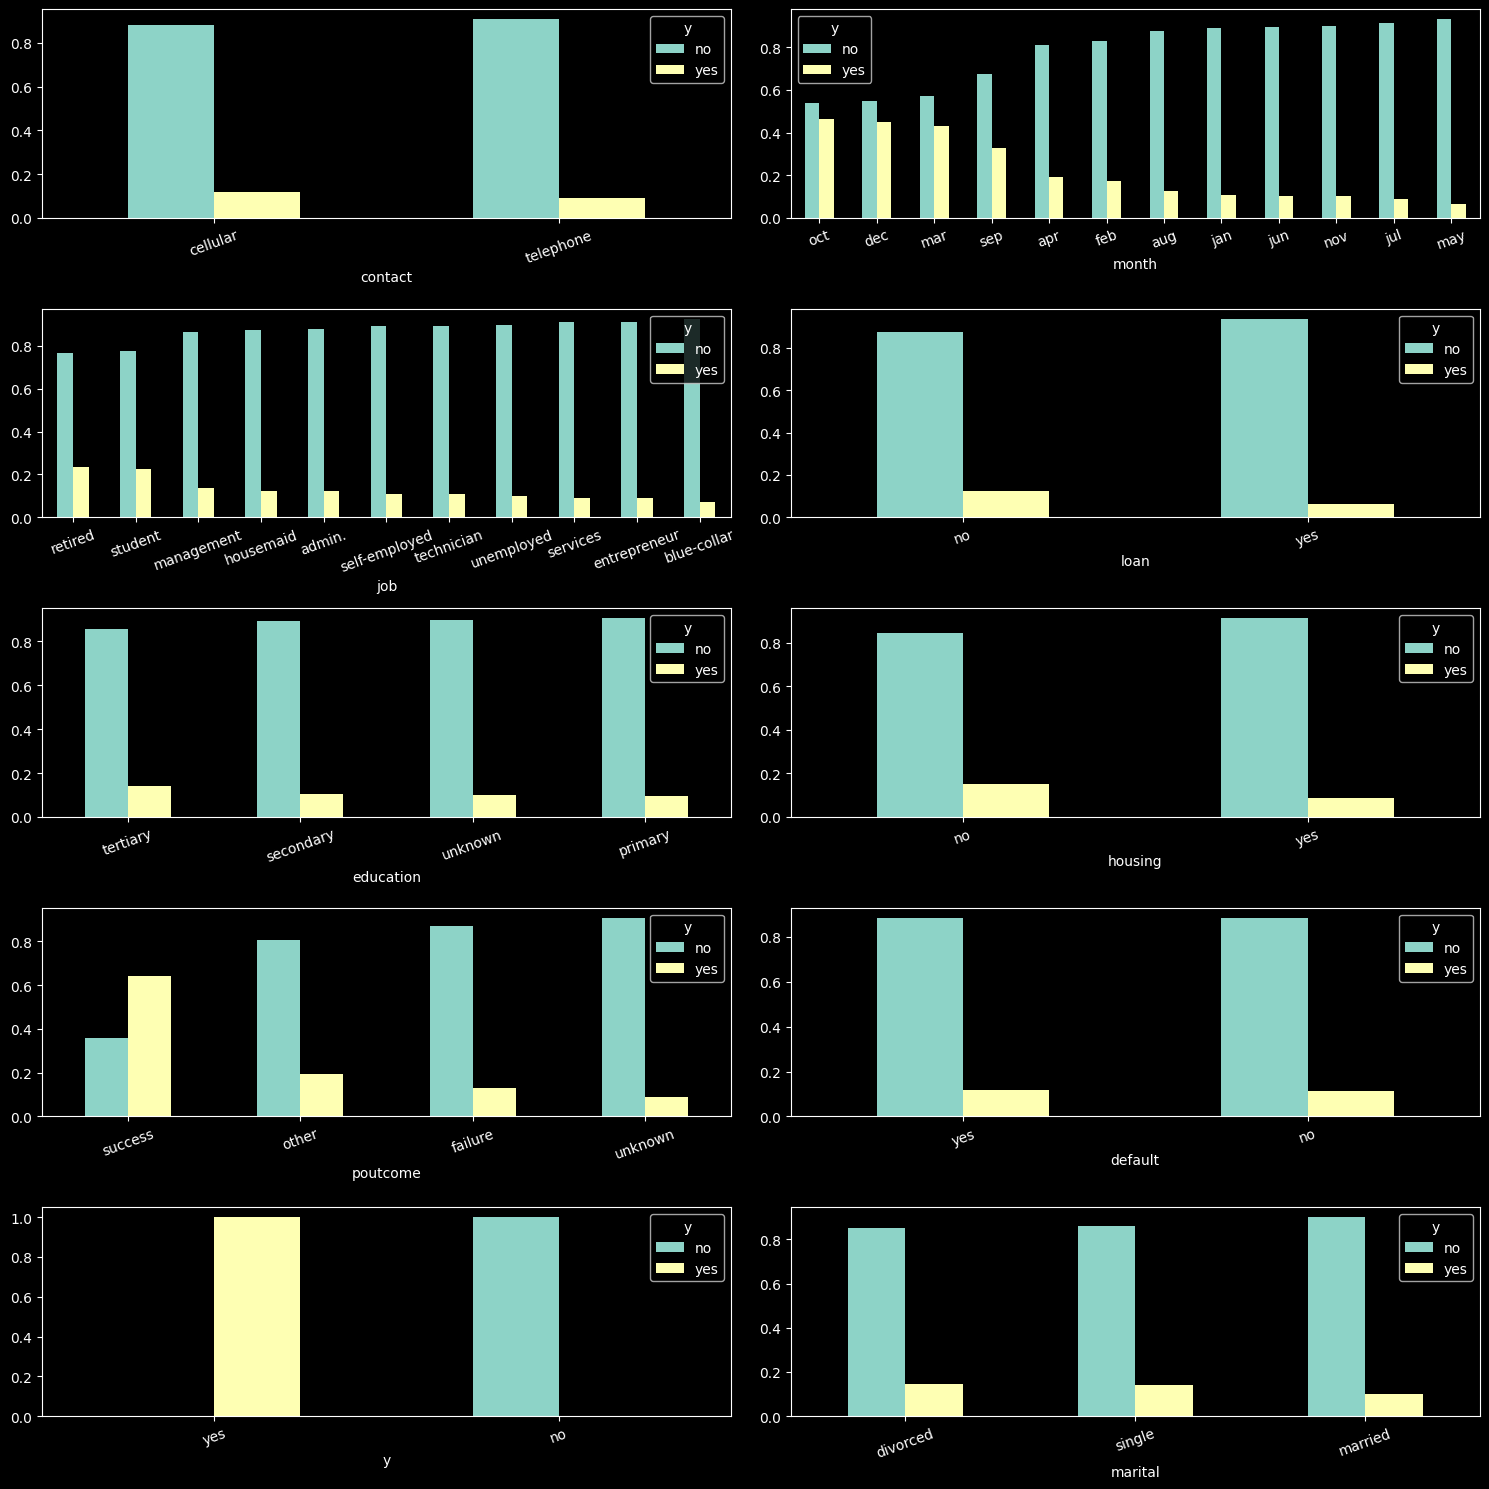

In [914]:
fig, ax = plt.subplots(5, 2, figsize=(15, 15), tight_layout=True)

for crosstab, ax_i in zip(crosstabs, ax.flatten()):
    crosstab.plot.bar(ax=ax_i, rot=20)

In [74]:
df.cov()

,age,balance,day,duration,campaign,pdays,previous
age,111.856238,2.668043e+03,-1.557268,-6.504919,-0.169314,-9.417378,-0.062886
balance,2668.042729,9.057922e+06,-215.386074,-12474.023425,-93.370853,2843.538053,133.523091
day,-1.557268,-2.153861e+02,68.024016,-52.785802,4.121894,-77.912251,-0.825706
duration,-6.504919,-1.247402e+04,-52.785802,67525.469519,-55.259760,270.064195,7.956848
campaign,-0.169314,-9.337085e+01,4.121894,-55.259760,9.670897,-28.998832,-0.357251
pdays,-9.417378,2.843538e+03,-77.912251,270.064195,-28.998832,10024.239560,97.932173
previous,-0.062886,1.335231e+02,-0.825706,7.956848,-0.357251,97.932173,2.868153


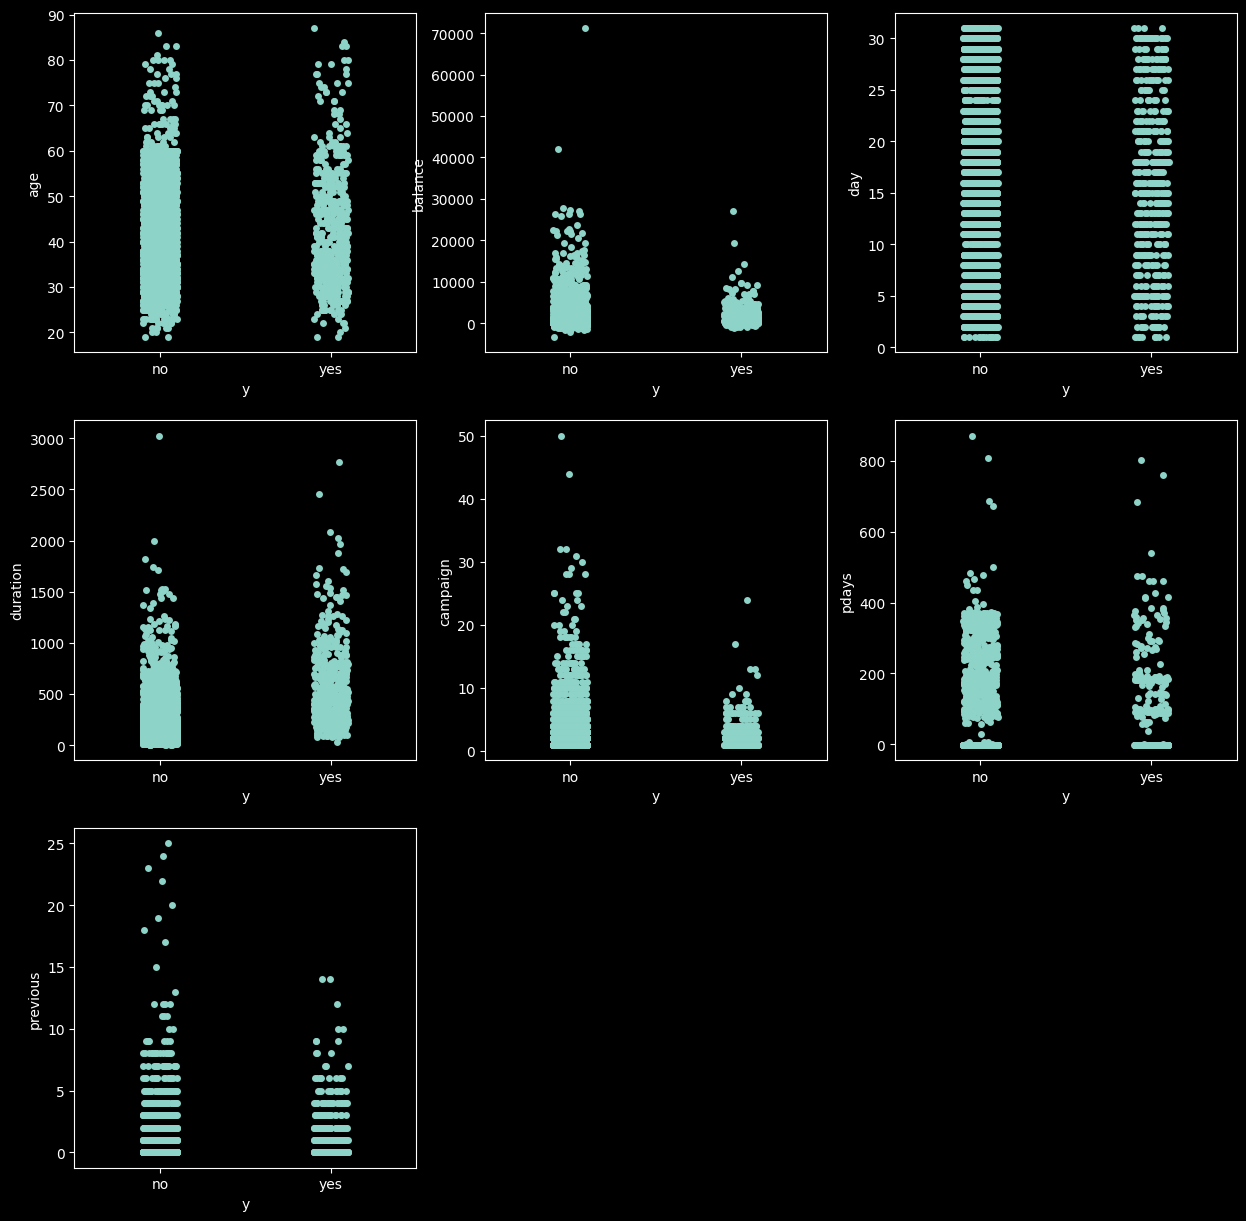

In [84]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for var_name, ax_i in zip(numeric_var_names, ax.flatten()):
    sns.stripplot(data=df, x=df.y, y=df.get(var_name), ax=ax_i)
    
fig.delaxes(ax[2][1]); fig.delaxes(ax[2][2])

##### I'll 